# Phase 4 – Supervised Learning


In [18]:
#  using colab_Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
#  Loading train and test data from google Drive
train = pd.read_csv("/content/drive/MyDrive/train.csv")
test = pd.read_csv("/content/drive/MyDrive/test.csv")

X_train = train.drop(columns=["target"])
y_train = train["target"]
X_test = test.drop(columns=["target"])
y_test = test["target"]

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (242, 16)
Test shape: (61, 16)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Train fresh models with Colab's sklearn version
logreg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
svm = SVC(probability=True, random_state=42).fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

# Save them back to Drive
joblib.dump(logreg, "/content/drive/MyDrive/models/logreg_model.pkl")
joblib.dump(rf, "/content/drive/MyDrive/models/randomforest_model.pkl")
joblib.dump(svm, "/content/drive/MyDrive/models/svm_model.pkl")
joblib.dump(knn, "/content/drive/MyDrive/models/knn_model.pkl")


['/content/drive/MyDrive/models/knn_model.pkl']

In [21]:
# Step 4: Evaluate models (fixed for multiclass targets)
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") and y_test.nunique() == 2 else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    results.append([name, acc, prec, rec, f1, roc])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])
results_df


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.590164,0.534719,0.590164,0.559041,None
1,Random Forest,0.573770,0.484699,0.573770,0.524728,None
2,SVM,0.557377,0.423497,0.557377,0.481010,None
3,KNN,0.540984,0.439091,0.540984,0.484618,None


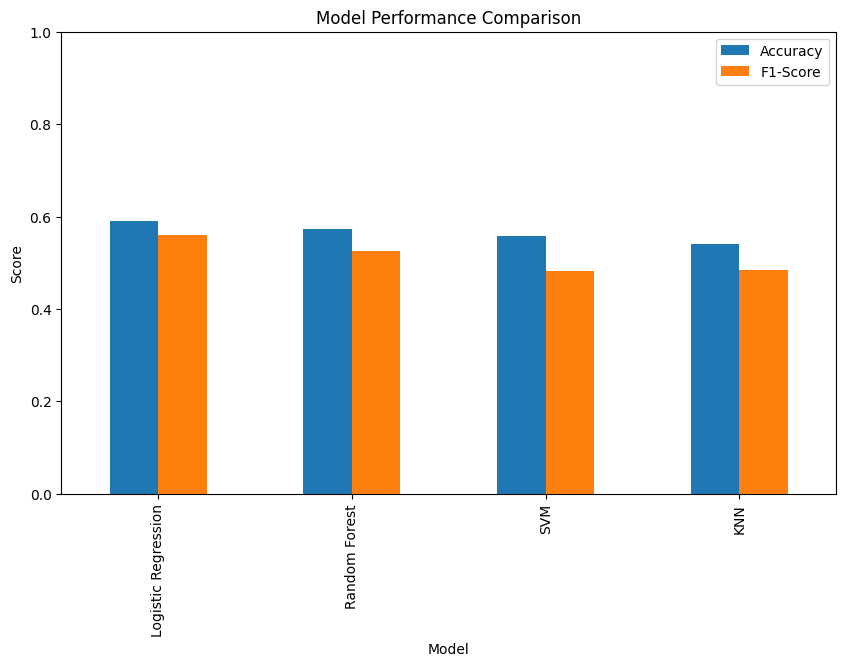

In [22]:
#  Comparing models in bar plot
results_df.set_index("Model")[["Accuracy","F1-Score","ROC-AUC"]].plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()


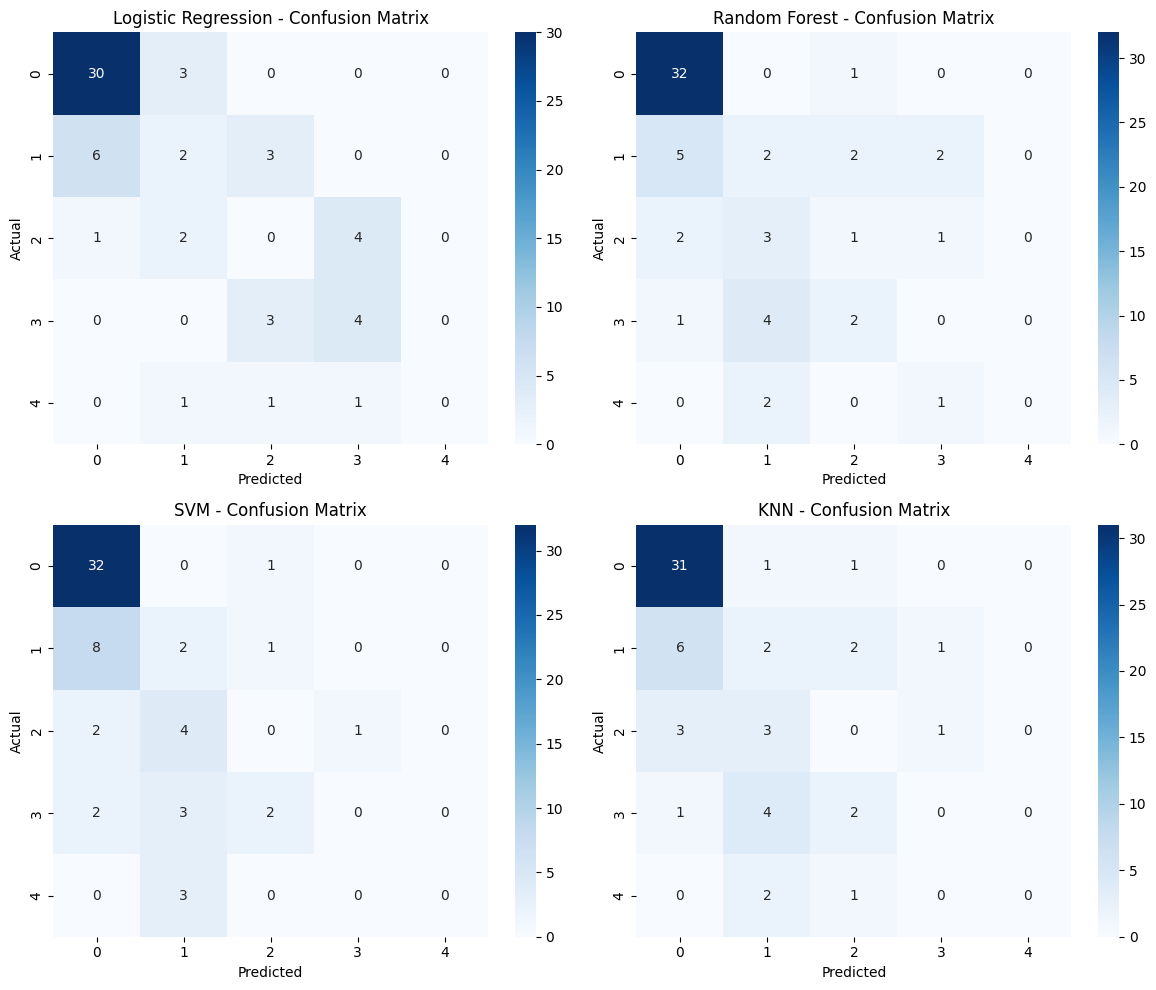

In [23]:
#  Confusion matrices for each model
fig, axes = plt.subplots(2, 2, figsize=(12,10))

for ax, (name, model) in zip(axes.flatten(), models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{name} - Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()
